In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stock_data={}
tickers=['GOOG','MSFT','GS']
for ticker in tickers:
    temp=yf.download(ticker,period='12mo')
    temp.dropna(how='any',inplace=True)
    stock_data[ticker]=temp


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df=stock_data['GOOG']

In [5]:
def aroon(data):
    data['Aroon_up'] = 100 * (25-df['High'].rolling(window=25).apply(lambda x: x.argmax()) / 25)
    data['Aroon_down'] = 100 * (25-df['Low'].rolling(window=25).apply(lambda x: x.argmin()) / 25) 
aroon(df)

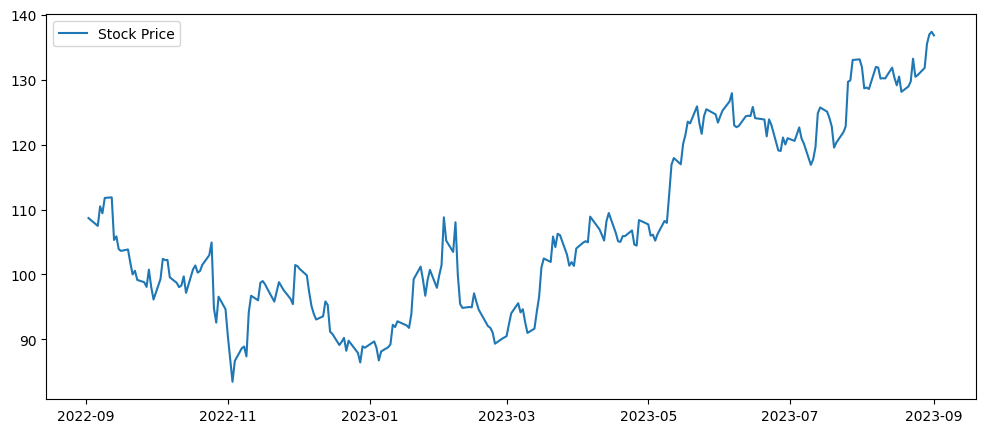

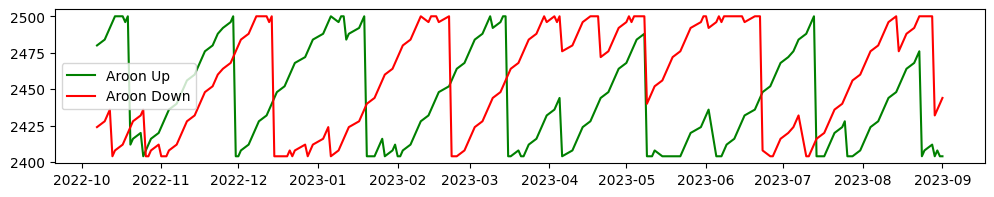

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'],label='Stock Price')
plt.legend()
plt.figure(figsize=(12,2))
plt.plot(df['Aroon_up'],color='green',label='Aroon Up')
plt.plot(df['Aroon_down'],color='red',label='Aroon Down')
plt.legend()